# **BLUE SKY CHALLENGE**

THEME - BLUE SKY BELOW 

TEAM NAME: TECH PHANTOMS



# Importing Needed Packages

In [40]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

# Reading CSV file as air_df and making Datetime column as index of dataframe

In [41]:
from google.colab import files
uploaded = files.upload()

Saving edited.csv to edited (1).csv


In [42]:
air_df = pd.read_csv('edited.csv', parse_dates=['Datetime'], index_col='Datetime')
air_df.head(5)

,C,T,Time,Date
Datetime,,,,
2004-10-03,2.6,13.6,18:00:00,2004-03-10
2004-10-03,2.0,13.3,19:00:00,2004-03-10
2004-10-03,2.2,11.9,20:00:00,2004-03-10
2004-10-03,2.2,11.0,21:00:00,2004-03-10
2004-10-03,1.6,11.2,22:00:00,2004-03-10


# Checking columns in our dataframe

In [43]:
air_df.columns

Index(['C', 'T', 'Time', 'Date'], dtype='object')

## Now shape

In [44]:
air_df.shape

(9357, 4)

In [45]:
air_df.describe()

,C,T
count,9357.000000,9357.000000
mean,-34.207524,9.778305
std,77.657170,43.203623
min,-200.000000,-200.000000
25%,0.600000,10.900000
50%,1.500000,17.200000
75%,2.600000,24.100000
max,11.900000,44.600000


# Checking is there any null values in dataset

In [46]:
air_df.isnull().any()

C       False
T       False
Time    False
Date    False
dtype: bool

### Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured. weather_x stores the rest of the dataset while weather_y has temperature column.

In [47]:
air_df_num=air_df.loc[:,['C','T']]
air_df_num.head()

,C,T
Datetime,,
2004-10-03,2.6,13.6
2004-10-03,2.0,13.3
2004-10-03,2.2,11.9
2004-10-03,2.2,11.0
2004-10-03,1.6,11.2


# Shape of new dataframe

In [48]:
air_df_num.shape

(9357, 2)

# Columns in new dataframe

In [49]:
air_df_num.columns

Index(['C', 'T'], dtype='object')

## Ploting all the column values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fca1f5690>,
      dtype=object)

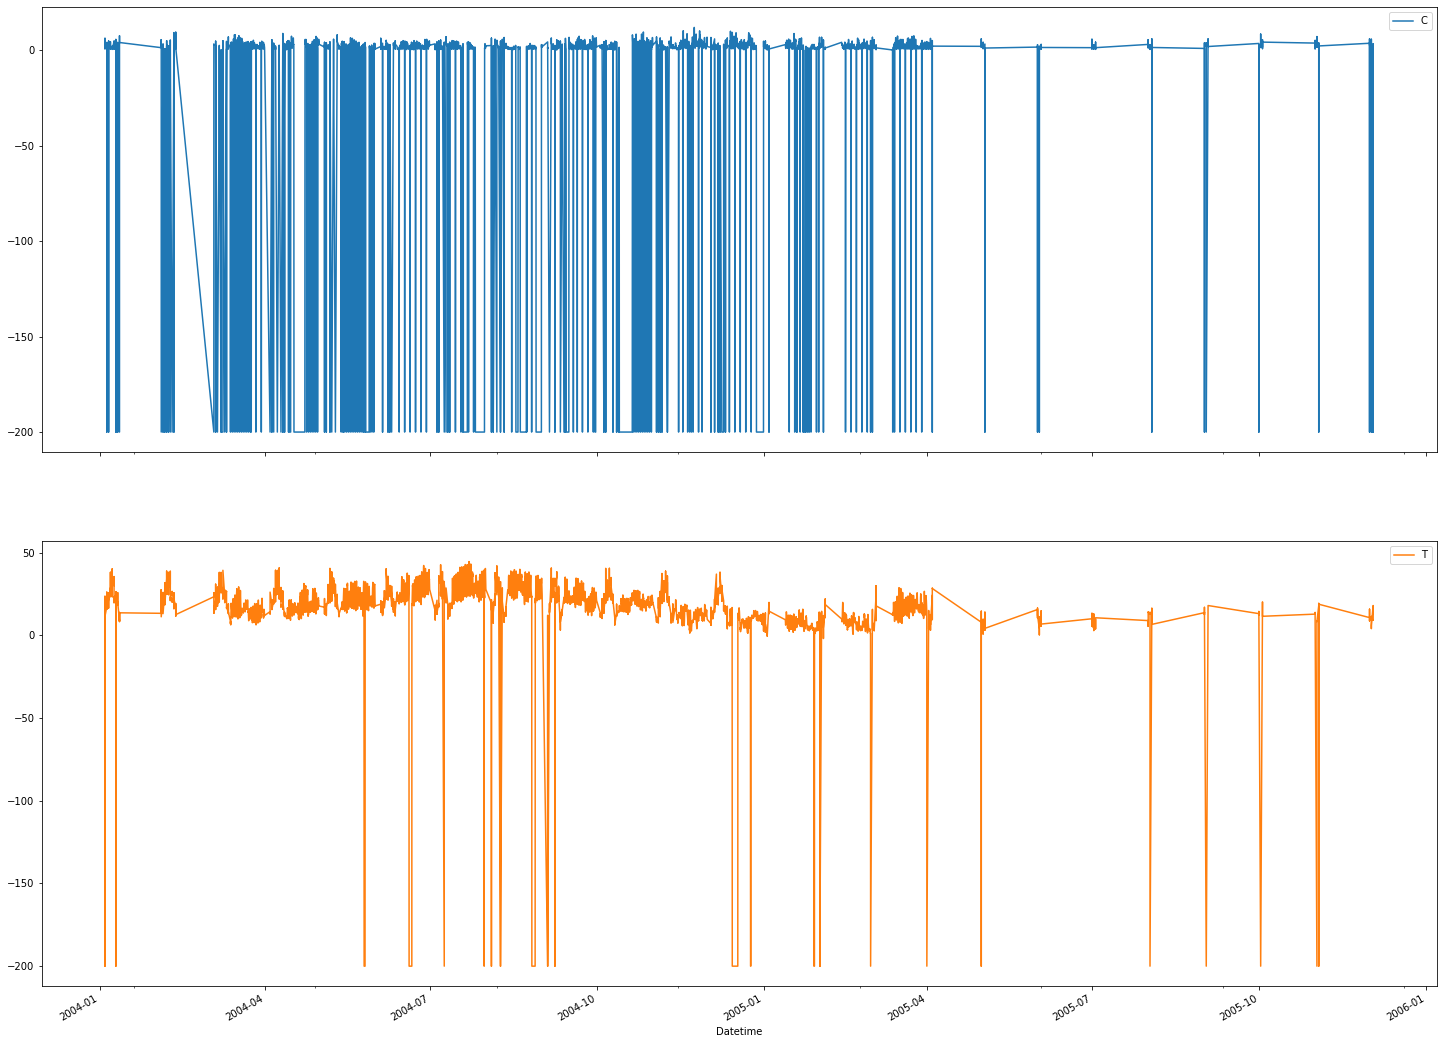

In [50]:
air_df_num.plot(subplots=True, figsize=(25,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fc9ee2d90>,
      dtype=object)

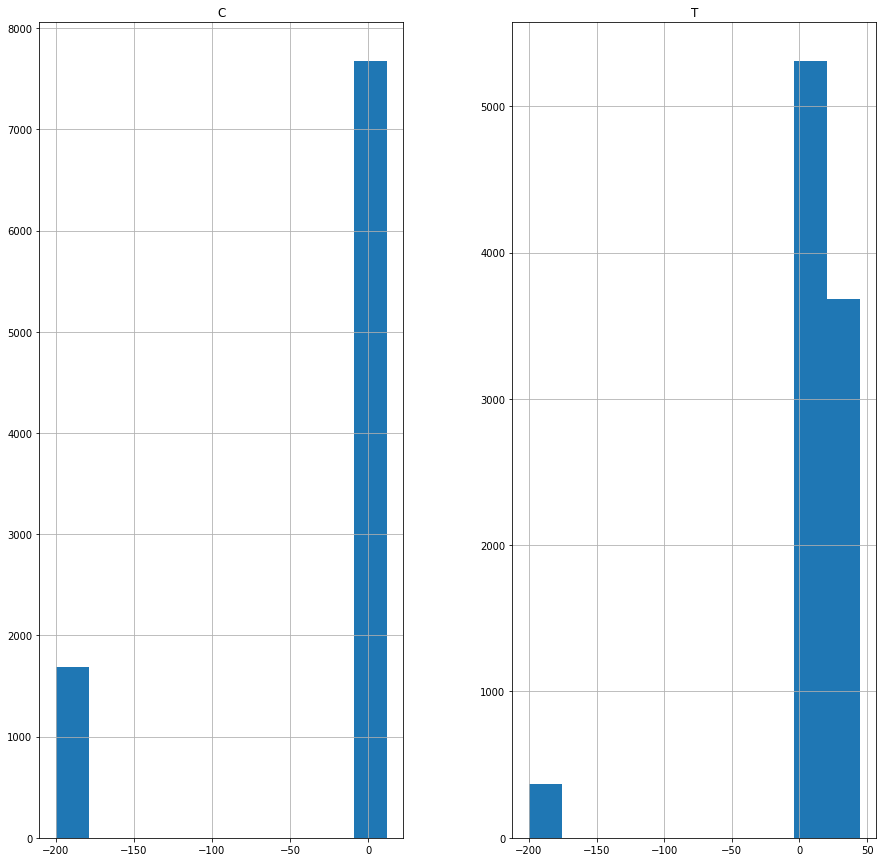

In [51]:
air_df_num.hist(bins=10,figsize=(15,15))

In [52]:
weth=air_df
weth.head()

,C,T,Time,Date
Datetime,,,,
2004-10-03,2.6,13.6,18:00:00,2004-03-10
2004-10-03,2.0,13.3,19:00:00,2004-03-10
2004-10-03,2.2,11.9,20:00:00,2004-03-10
2004-10-03,2.2,11.0,21:00:00,2004-03-10
2004-10-03,1.6,11.2,22:00:00,2004-03-10


In [53]:
air_y=air_df_num.pop("C")
air_x=air_df_num

### Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing.

In [54]:
train_X,test_X,train_y,test_y=train_test_split(air_x,air_y,test_size=0.981404)

In [55]:
train_X.shape

(174, 1)

In [56]:
train_y.shape

(174,)

### train_x has all the features except temperature and train_y has the corresponding temperature for those features. in supervised machine learning we first feed the model with input and associated output and then we check with a new input.

In [57]:
train_y.head()

Datetime
2004-09-06 00:00:00      1.5
2004-07-31 13:00:00      2.2
2004-03-29 04:00:00      0.6
2004-12-10 00:00:00   -200.0
2005-03-27 21:00:00      1.9
Name: C, dtype: float64

In [58]:
histories = [] 

# Multiple Linear Regression

In [59]:
temp=air_df['T']
C=air_df['C']

In [60]:
x = np.array(temp).reshape(-1, 1) # function name says it : reshape the array
y = np.array(C)

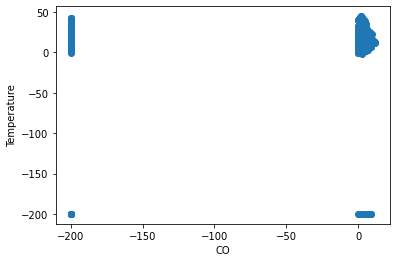

In [61]:
plt.scatter(C,temp)
plt.xlabel("CO")
plt.ylabel("Temperature")
plt.show()

In [62]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [63]:
prediction = model.predict(test_X)

In [64]:
#calculating error
np.mean(np.absolute(prediction-test_y))

57.592320719397584

In [65]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.00


In [66]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
Datetime,,,
2004-04-06 00:00:00,-200.0,-33.19,-166.81
2004-10-19 23:00:00,-200.0,-32.70,-167.30
2004-08-15 16:00:00,0.5,-36.22,36.72
2004-07-14 07:00:00,4.7,-32.83,37.53
2005-10-03 00:00:00,4.7,-31.81,36.51
...,...,...,...
2004-10-27 16:00:00,2.1,-32.83,34.93
2004-06-07 00:00:00,0.6,-33.51,34.11
2004-05-30 09:00:00,0.3,-33.22,33.52


# Decision Tree Regression 

In [67]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [68]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

57.27079204326823

In [69]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: -0.78


In [70]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
Datetime,,,
2004-04-06 00:00:00,-200.0,-200.0,0.0
2004-10-19 23:00:00,-200.0,3.0,-203.0
2004-08-15 16:00:00,0.5,2.5,-2.0
2004-07-14 07:00:00,4.7,-200.0,204.7
2005-10-03 00:00:00,4.7,3.1,1.6
...,...,...,...
2004-10-27 16:00:00,2.1,-200.0,202.1
2004-06-07 00:00:00,0.6,1.5,-0.9
2004-05-30 09:00:00,0.3,1.6,-1.3


# Random Forest Regression

In [71]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [72]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

56.342638185263034

In [73]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: -0.37


In [74]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
Datetime,,,
2004-04-06 00:00:00,-200.0,-121.40,-78.60
2004-10-19 23:00:00,-200.0,0.82,-200.82
2004-08-15 16:00:00,0.5,-29.33,29.83
2004-07-14 07:00:00,4.7,-111.43,116.13
2005-10-03 00:00:00,4.7,-47.91,52.61
...,...,...,...
2004-10-27 16:00:00,2.1,-111.43,113.53
2004-06-07 00:00:00,0.6,1.43,-0.83
2004-05-30 09:00:00,0.3,-0.76,1.06


In [75]:
from sklearn.metrics import r2_score

# Calculating R2-score for Multiple Linear Regression

In [97]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - prediction)))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

#print("MAPE : %.2f" % np.mean(np.absolute((test_y- prediction)/test_y)))
print("MAPE : %.2f" % round(np.mean(np.abs((test_y- prediction) /test_y))))

Mean absolute error: 57.59
R2-score: 0.00
MAPE : 22.00


# Calculating R2-score for Decision Tree Regression

In [98]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

print("MAPE : %.2f" % np.mean(np.absolute((test_y- prediction2)/test_y)))

Mean absolute error: 57.27
R2-score: -0.78
MAPE : 23.39


# Calculating R2-score for Random Forest Regression

In [99]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

print("MAPE : %.2f" % np.mean(np.absolute((test_y- prediction3)/test_y)))

Mean absolute error: 56.34
R2-score: -0.37
MAPE : 22.04
